# Rotate objects and velocity wrt. heading


In [16]:
import numpy as np
import matplotlib.pylab as plt
import time 
%matplotlib inline
import pickle
import sys 
import os
from sphereIntersection import sphere_line_intersection
from operator import itemgetter
from numpy import linalg as LA

In [2]:
with open('obstacles.pickle', 'rb') as f:  # Python 3: open(..., 'rb')
    obstacle = pickle.load(f)
# set heading 
with open('initialVariables.pickle', 'rb') as f:  # Python 3: open(..., 'rb')
    position, velocity,heading =  pickle.load(f)


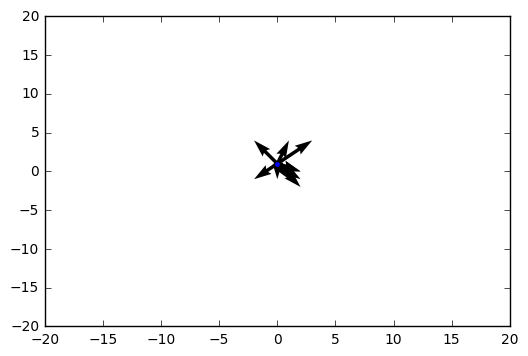

In [3]:
vec1 = np.multiply(np.ones_like(obstacle[:,0:2]),position[0:2])
vec1 = np.column_stack([vec1, obstacle[:,0:2]])
X, Y, U, V = zip(*vec1)
plt.figure()
ax = plt.gca()
x = ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1)
ax.set_xlim([-20, 20])
ax.set_ylim([-20, 20])
y = plt.scatter(position[0], position[1])
plt.draw()


In [4]:
obstacles = obstacle
alpha= -heading[0] # negative rotation about z axis
rot = np.array([np.cos(alpha), -np.sin(alpha), 0,np.sin(alpha), np.cos(alpha),0, 0,0,1])
rot = rot.reshape(3,3)
mat_rot= np.array([[np.dot(rot, i)] for i in obstacles[:,0:3]])
[r,d,c] = mat_rot.shape
obstacles_rot = mat_rot.reshape(r,c)
obstacles[:,0:3]=obstacles_rot
#print(obstacles)

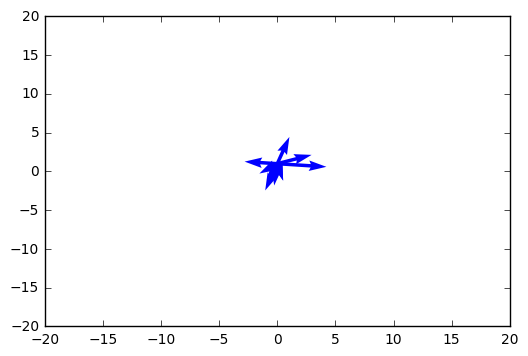

In [5]:
vec1 = np.multiply(np.ones_like(obstacles[:,0:2]),position[0:2])
vec1 = np.column_stack([vec1, obstacles[:,0:2]])
X, Y, U, V = zip(*vec1)
ax = plt.gca()
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, color= 'b')
ax.set_xlim([-20, 20])
ax.set_ylim([-20, 20])
plt.draw()
plt.show()

In [6]:
#  Velocity rotation
vel_rot = np.dot(rot, velocity)




In [7]:
obstacles

array([[ 0.5018485 , -2.17902457,  0.        ,  2.        ],
       [-0.90593594, -2.04432876,  0.        ,  1.        ],
       [-2.81556889,  0.26939163,  0.        ,  2.        ],
       [ 0.5018485 , -2.17902457,  0.        ,  1.        ],
       [-1.04063176, -3.4521132 ,  0.        ,  1.        ],
       [-1.54248026, -1.27308863,  0.        ,  2.        ],
       [-0.26939163, -2.81556889,  0.        ,  2.        ],
       [ 2.9502647 ,  1.13839281,  0.        ,  2.        ],
       [ 1.04063176,  3.4521132 ,  0.        ,  1.        ],
       [ 4.22335333, -0.40408745,  0.        ,  1.        ]])

In [8]:
with open('obsRotated.pickle', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([obstacles,vel_rot], f)


In [43]:
u =(obstacle[:,0:2]-position[0:2])
print(u[:,0])
u1 = np.abs(u[:,0])-obstacles[:,3]

u2 = np.abs(u[:,1])-obstacles[:,3]
u = np.column_stack([u1,u2])
print(u)
p = [[LA.norm(a)] for a in u]
p

[ 0.5018485  -0.90593594 -2.81556889  0.5018485  -1.04063176 -1.54248026
 -0.26939163  2.9502647   1.04063176  4.22335333]
[[-1.4981515   1.17902457]
 [-0.09406406  2.04432876]
 [ 0.81556889 -1.26939163]
 [-0.4981515   2.17902457]
 [ 0.04063176  3.4521132 ]
 [-0.45751974  0.27308863]
 [-1.73060837  1.81556889]
 [ 0.9502647  -1.86160719]
 [ 0.04063176  1.4521132 ]
 [ 3.22335333  0.40408745]]


[[1.9064513792462481],
 [2.046491659384635],
 [1.5088100337460535],
 [2.2352411508523056],
 [3.4523523113600851],
 [0.53282427966984414],
 [2.5082455438171545],
 [2.0901158631691015],
 [1.4526815493778902],
 [3.2485832824761083]]

ValueError: operands could not be broadcast together with shapes (10,2) (10,) 